## Visualizing parts of CNN using Keras

In [1]:
#https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59

In [2]:
from skimage import color
from skimage import io
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy
%matplotlib inline

In [3]:
img = cv2.imread('images/images01/00000001_000.png')

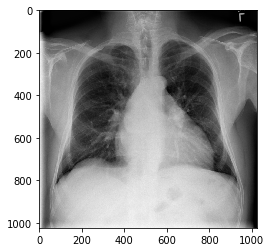

In [4]:
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

In [5]:
img.shape

(1024, 1024, 3)

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [7]:
rgb2gray(img)

array([[202., 199., 195., ...,   5.,   2.,   0.],
       [199., 196., 195., ...,   5.,   2.,   0.],
       [196., 194., 193., ...,   5.,   2.,   0.],
       ...,
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 254., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.]])

## Resize image into 64*64

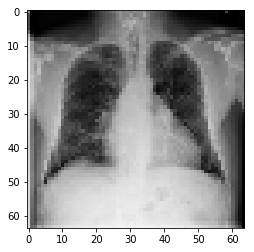

In [8]:
img_new = cv2.resize(img, (64, 64)) 
plt.imshow(img_new, cmap = plt.get_cmap('gray'))

In [9]:
img_new.shape

(64, 64, 3)

## 1. First layer

In [10]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout

/home/cc/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5,5), input_shape=img_new.shape))

In [12]:
img_batch = np.expand_dims(img_new,axis=0)

In [13]:
conv_img = model.predict(img_batch)

In [14]:
def visualize_img(img_batch):
    img = np.squeeze(img_batch, axis=0)
    print(img.shape)
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(60, 60, 3)


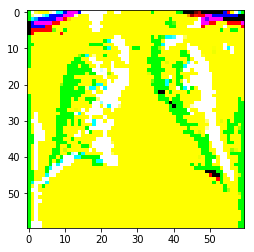

In [15]:
visualize_img(conv_img)

## 2. Add a Pooling Layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(30, 30, 3)


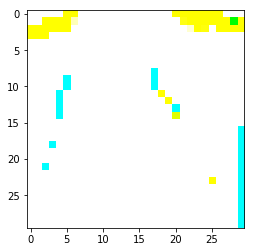

In [16]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5,5), input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

conv_img = model.predict(img_batch)
visualize_img(conv_img)

## 3. Second layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(28, 28, 3)


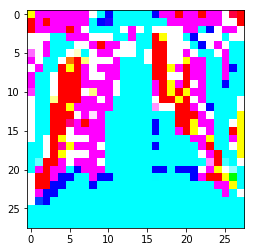

In [17]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5,5), input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, kernel_size=(3,3),input_shape=img_new.shape))

conv_img = model.predict(img_batch)
visualize_img(conv_img)

## 4. Add a Pooling Layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(14, 14, 3)


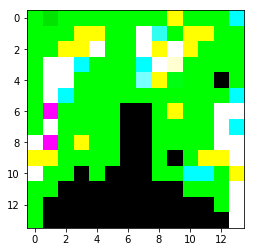

In [18]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5,5), input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, kernel_size=(3,3),input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

conv_img = model.predict(img_batch)
visualize_img(conv_img)

## 5. Add an Activation layer "relu"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(14, 14, 3)


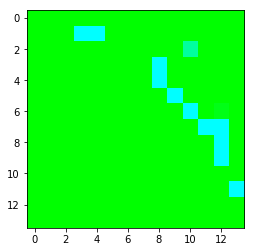

In [19]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5,5), input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, kernel_size=(3,3),input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

conv_img = model.predict(img_batch)
visualize_img(conv_img)

## 6. Final: add a Pooling Layer "softmax"

(14, 14, 3)


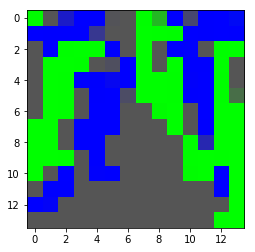

In [20]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5,5), input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, kernel_size=(3,3),input_shape=img_new.shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Activation('softmax'))

conv_img = model.predict(img_batch)
visualize_img(conv_img)